In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
from matplotlib import cm

%matplotlib notebook

# Q1
The following implementaion for f1() and f2() are:
* $f_1(x, y)$ = $x^2+y^2$
* $f_2(x, y)$ = $x^2-y^2$

In [22]:
def f1(x, y):
    return np.power(x, 2) + np.power(y, 2)

def f2(x, y):
    return np.power(x, 2) - np.power(y, 2)

For the visual analysis th intervals x$\in$[-10, 10] $\&$ y$\in$[-10, 10] are taken with each interval having 100 discrete points. 

In [23]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z1 = f1(X, Y)
Z2 = f2(X, Y)

<IPython.core.display.Javascript object>


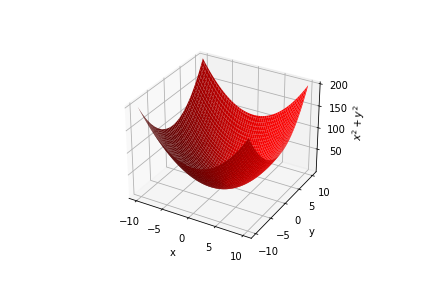

Text(0.5, 0, '$x^2+y^2$')

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$x^2+y^2$')

<IPython.core.display.Javascript object>


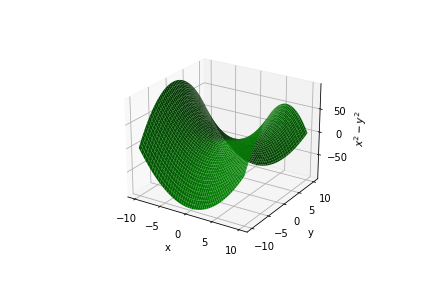

Text(0.5, 0, '$x^2-y^2$')

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z2, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$x^2-y^2$')

# Q2
Given $V|_{\phi=0}=0$ and $V|_{\phi=45^o}=V_0$
## (a)
This wedged capacitor problem can be solved in cyclindrical coordinate system with no complexity rather than cartesian coordinate system.
Observe that we there is charge in the given sapce and boundary conditions are given.This means we can use Laplace equation for finding potential.

$\begin{gather}
\nabla^2 V = 0\\
\frac{\partial^2 V}{\partial r^2} + \frac{\partial^2 V}{\partial \phi^2} + \frac{\partial^2 V}{\partial z^2} = 0
\end{gather}$

Given no dependency on z and see that even V is independent on r because ant any radius boundary conditions are same so as the solution.

$\begin{gather}
\frac{\partial^2 V}{\partial \phi^2} = 0\\
\implies \text{Possible solution is } V = A\phi + B\\
\text{Applying boundary conditions } V|_{\phi=0}= (A\phi + B)|_{\phi=0} = 0 \implies B = 0\\
V|_{\phi=45^o}= (A\phi + B)|_{\phi=45^o} = V_0 \implies A = 4V_0/\pi\\
\implies \boxed{V = \frac{4V_0}{\pi}\phi}
\end{gather}$

## (b)
$\begin{gather}
\vec{E} = -\vec{\nabla}.V\\
\vec{E} = \frac{-1}{r}\left(\frac{\partial rV_r}{\partial r}\hat{r} + \frac{\partial V_\phi}{\partial \phi}\hat{\phi} + \frac{\partial rV_z}{\partial z}\hat{z}\right)\\
\implies \boxed{\vec{E} = \frac{-4V_0}{r\pi}\hat{\phi}}
\end{gather}$
Applying Gauss law on conductor at $\phi=0$.

$\begin{gather}
{E_{above}} - {E_{below}} = \frac{\sigma}{\epsilon_o}
\implies \frac{-4V_0}{r\pi} = \frac{\sigma}{\epsilon_o} \implies \boxed{\sigma = \frac{-4\epsilon_oV_0}{r\pi}}
\end{gather}$


# Q3
## When $\phi=22.5^o$, Potential is $\frac{V_0}{2}$

(20, 40)


<IPython.core.display.Javascript object>


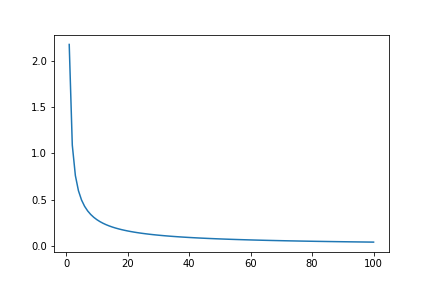

In [59]:
N = 20
itr = 100
x = 0

rows = N
cols = 2*N + x

V = np.zeros((rows, cols))
#V[rows, N-1-rows] = 1
print(V.shape)

def re_intit(V, N):
    for i in range(N):
        V[i, :N-i] = 0
        V[i, N+i+x] = 1
        V[i, N+i+x+1:] = 0
re_intit(V, N)
#print(V)
V_prev = V.copy()
err = []
for i in range(itr):
    #V[1:rows-1, 1:cols-1] = 0.25*(V[1:rows-1, 0:cols-2] + V[1:rows-1, 2:cols] + V[0:rows-2, 1:cols-1] + V[2:rows, 1:cols-1])
    V[1:rows, 1:cols-1] = 0.5*(V[1:rows, 0:cols-2] + V[1:rows, 2:cols])
    re_intit(V, N)
    err_dif = V - V_prev
    err_i = np.sqrt(np.sum((err_dif**2)))
    err.append(err_i)

    V_prev = V.copy()
#print(np.round(V, 3))
err = np.array(err)

plt.plot(np.arange(itr)+1, err)
plt.show()

In [ ]:
x = np.arange(2*N)
y = np.arange(N)

xwed = np.linspace(0, N-1, N)
zwed = np.linspace(0, 1, N)

X, Y = np.meshgrid(x, y)

Xwed, Zwed = np.meshgrid(xwed, zwed)

Ylwed = N-1 - Xwed
Yuwed =  Xwed + N

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.plot_surface(Xwed, Ylwed, Zwed, color='yellow')
ax.plot_surface(Yuwed, Xwed, Zwed, color='yellow')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')
plt.show()

# Q4
$\begin{gather}
f(x) = 4x^4 + x^2 - x + 3\\
\boxed{f^{''}(x) = 48x^2 + 2}
\end{gather}$

## Forward approximation
$f^{''}(x) = \frac{f(x+2h) -2f(x+h) + f(x)}{h^2}$
## Central approximation
$f^{''}(x) = \frac{f(x+h) -2f(x) + f(x-h)}{2h^2}$

## Error = $\frac{F^{''}(x) - f^{''}(x)}{f^{''}(x)}$

In [10]:
def f(x):
    return 4*np.power(x, 4) + np.power(x, 2) - x +3

def fxx(x):
    return 48*np.power(x, 2) + 2

In [42]:
x = 10
h = 0.1
N = 10

H = h*np.array([2**(-1*i) for i in range(N)], dtype=np.float32)
Fxx_c = (f(x+H) + f(x-H) - 2*f(x))/(2*np.power(h, 2))
Fxx_f = (f(x+2*H) - 2*f(x+H) + f(x))/np.power(h, 2)

err_c = np.absolute(Fxx_c-fxx(x))/fxx(x)
err_f = np.absolute(Fxx_f-fxx(x))/fxx(x)

<IPython.core.display.Javascript object>


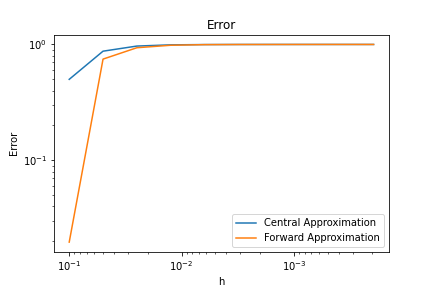

In [43]:
plt.figure()
plt.title('Error')
plt.loglog(H, err_c, label='Central Approximation')
plt.loglog(H, err_f, label='Forward Approximation')
plt.xlabel('h')
plt.ylabel("Error")
plt.gca().invert_xaxis()
plt.legend()
plt.show()